In [1]:
import xarray as xr

In [2]:
file = '/glade/work/jpan/CMORPH/www.ncei.noaa.gov/data/cmorph-high-resolution-global-precipitation-estimates/access/30min/8km/2018/01/01/CMORPH_V1.0_ADJ_8km-30min_2018010101.nc'

In [3]:
ds = xr.open_dataset(file)

In [4]:
ds

<xarray.Dataset>
Dimensions:      (time: 2, nv: 2, lat: 1649, lon: 4948)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01T01:00:00 2018-01-01T01:30:00
  * lat          (lat) float64 -59.96 -59.89 -59.82 -59.75 ... 59.82 59.89 59.96
  * lon          (lon) float64 0.03638 0.1091 0.1819 ... 359.8 359.9 360.0
Dimensions without coordinates: nv
Data variables:
    time_bounds  (time, nv) datetime64[ns] ...
    lat_bounds   (lat, nv) float64 ...
    lon_bounds   (lon, nv) float64 ...
    cmorph       (time, lat, lon) float32 ...
Attributes: (12/57)
    ncei_template_version:      NCEI_NetCDF_Grid_template_V2.0
    title:                      NOAA Climate Data Record (CDR) of CPC Morphin...
    keywords:                   Precipitation, Satellite, High-Resolution, Gl...
    summary:                    The CMORPH CDR is a reprocessed and bias-corr...
    references:                 Xie, P., et al. (2017), Reprocessed, Bias-Cor...
    Conventions:                CF-1.6, ACDD-1.3
    ...                         ...
    geospatial_lat_resolution:  0.072771376
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_resolution:  0.072756669
    geospatial_lon_units:       degrees_east

In [45]:
mask1 = (ds.lat >= 42) & (ds.lat < 52) & (ds.lon > 230) & (ds.lon < 265)
mask2 = (ds.lat >= 24) & (ds.lat < 42) & (ds.lon > 230) & (ds.lon < 285)
mask3 = (ds.lat >= 15) & (ds.lat < 24) & (ds.lon > 260) & (ds.lon < 285)
mask4 = 0 & (ds.lat > 24) & (ds.lat < 52) & (ds.lon > 230) & (ds.lon < 285)

mastermask = mask1 | mask2 | mask3 | mask4

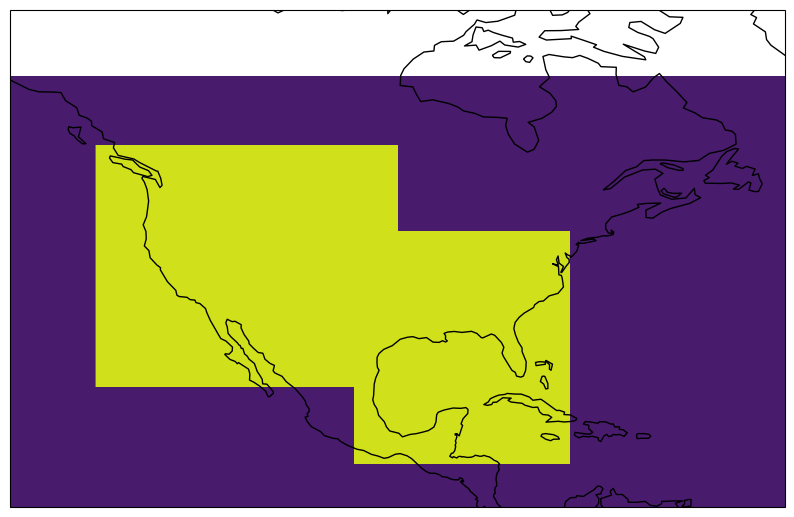

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(10,7), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([220, 310, 10, 60])
#ax.imshow(mask1.T, transform=ccrs.PlateCarree())
ax.contourf(ds.lon, ds.lat, mastermask)
ax.coastlines()

In [47]:
mastermask.sum()

<xarray.DataArray ()>
array(295574)

In [49]:
mastermask.to_netcdf('CMORPH_Harris_mask_orig.nc')